# TechX 2020 计算社科预习 Quiz 3 V1.0

这个测试的目的不是为了难倒大家，而是为了检验预习成果，方便我们调整接下来的预习和课程安排。同时，我们也希望你们能通过这几个练习学到的知识，并学到的coding技巧。因此，我们有如下要求：
1. 虽然我们不允许大家向别人请教 quiz 中的问题，但是你们可以在互联网上搜索已有的资源：这也是在TechX的学习过程中大家会一直做的。（PS 请别直接抄代码！请理解之后自己实现）
2. 有些题目里会给出一些变量/数据，但是我们批改的时候可能会改动它们以检测你程序的可拓展性。
3. 请在北京时间 8.2 24:00之前在教学立方提交，如有事无法按时请私信自己的对应AL（在预习文档里 https://shimo.im/docs/eIy4MXRYkLoZvE2Z ）。
4. 如果感觉题目有问题或表述不清请直接在群里提出。我们有可能根据大家的提问发布V2.0 的 Quiz。

## 0. Setup

请在下面导入numpy(用np代替)，pandas（用pd代替）, 以及 matplotlib的相关包

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

# 1. Plotting
下面所有的图都需要有以下元素：
1. 标题
2. 坐标轴的annotation
3. 相关 legends

a. 用pandas导入 Data Science Handbook notebooks/data/中的 state-population.csv 文件，把它命名为df

In [239]:
df = pd.read_csv(r'C:\Users\Bertrand\Desktop\TechX预习材料\PythonDataScienceHandbook-master\PythonDataScienceHandbook-master\notebooks\data\state-population.csv')

b. 在df的时间范围里，请选择合适的数据图展示 California 与 Texas 的总人口变化，并用你喜欢的颜色区分他们两个。

Text(0, 0.5, 'population')

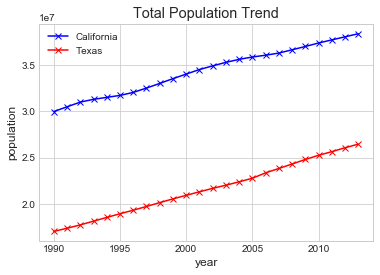

In [240]:
pop_CA = df[(df['state/region'] == 'CA') & (df.ages == 'total')].sort_values(by='year')['population'].values
pop_TX = df[(df['state/region'] == 'TX') & (df.ages == 'total')].sort_values(by='year')['population'].values
time = np.arange(1990,2014)
plt.plot(time, pop_CA, '-xb', label='California')
plt.plot(time, pop_TX, '-xr', label='Texas')
plt.legend()
plt.title('Total Population Trend')
plt.xlabel('year')
plt.ylabel('population')

c. 选用合适的bin number来展示 2010 年美国各州的18岁以下人口的频率直方图(histogram)。

Text(0, 0.5, 'count')

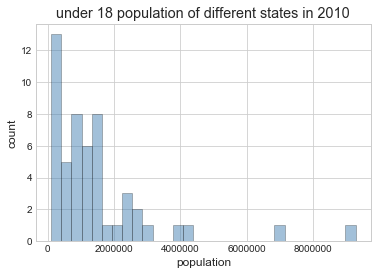

In [241]:
under_18_2010 = df[(df.ages == 'under18') & (df.year == 2010) & (df['state/region'] !='USA')]['population'].values
plt.hist(under_18_2010, bins=30, alpha=0.5,
         histtype='bar', color='steelblue',
         edgecolor='k')
plt.title('under 18 population of different states in 2010')
plt.xlabel('population')
plt.ylabel('count')

d. 用scatter plot展示2005-2010美国各州平均总人口与平均增长率的关系（请注意平均增长率的计算方式）。
描述有哪些州比较特殊，根据你的知识分析这些州特殊的原因。

Text(0, 0.5, 'Compound Annual Growth Rate')

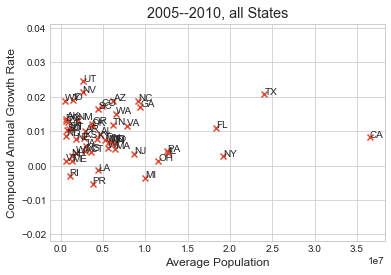

In [242]:
def get_CAGR(x, start, end):
    x = float((x[x.year == end]['population'].values) / (x[x.year == start]['population'].values))**(1/(end - start)) - 1
    return x

#Plotting
df1 = df[(df['state/region']!='USA') & (df.year>=2005) & (df.year<=2010) & (df.ages=='total')].groupby('state/region')
pop_bar = df1.mean()['population']
CAGR = df1.apply(get_CAGR, start=2005, end=2010)
plt.scatter(pop_bar,CAGR, marker='x')

#labelling each point
state_name = CAGR.index
for i, txt in enumerate(state_name):
    plt.annotate(txt, (pop_bar[i], CAGR[i]))

#Other annotations
plt.title('2005--2010, all States')
plt.xlabel('Average Population')
plt.ylabel('Compound Annual Growth Rate')

In [243]:
'''
a few points to be made about the chart above:

1. outliers:
    
    California, Texas, New York and Florida (in decending order) have far more population than other states. 
    This might be due to cultrual, historical and economical reasons, such as the immigration from Mexico to Texas. 
    
2. decreasing population:

    Louisiana, Rhode Island, Michigan and Puerto Rico all faced population loss in the mentioned period.
    Emigration to mainland might account for the decrease in Puerto Rico.
    
    
3. growing fast:
    
    Utah, Nevada and Texas have the most robustly growing population.
    Mormonism，the widely believed religion in Utah, encourages people to have more children, which could make Utah's birth
    rate relatively high.
    
'''


"\na few points to be made about the chart above:\n\n1. outliers:\n    \n    California, Texas, New York and Florida (in decending order) have far more population than other states. \n    This might be due to cultrual, historical and economical reasons, such as the immigration from Mexico to Texas. \n    \n2. decreasing population:\n\n    Louisiana, Rhode Island, Michigan and Puerto Rico all faced population loss in the mentioned period.\n    Emigration to mainland might account for the decrease in Puerto Rico.\n    \n    \n3. growing fast:\n    \n    Utah, Nevada and Texas have the most robustly growing population.\n    Mormonism，the widely believed religion in Utah, encourages people to have more children, which could make Utah's birth\n    rate relatively high.\n    \n"

# 2. 数学

a. 请在一个x-y坐标系内画出 $y = 2x^2+1$ 的图像，并说明在x=1的时候，此函数的导数的值以及它的几何意义。请在同一个坐标系里画出在x=1时该方程的切线。

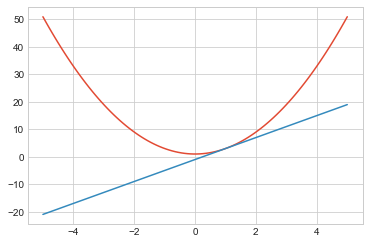

In [168]:
x = np.linspace(-5, 5, 100)
plt.plot(x, 2*x**2+1)
# when x=1, y'=4, which means the gradient of the tangent to the function at x=1 is 4
plt.plot(x, 4*x-1)

b. 请用 04.04 中的方法，画出函数 $z = x^2 + y^2$ 在 $|x|\leq 3, |y| \leq 3$内的contour plot (用颜色体现z的大小)。根据你的理解，分别解释此函数 $x=0, y=0$ 以及 $x = 1, y = 0$ 两个点的时候 gradient(梯度) 的大小以及方向。

(-3.0, 3.0, -3.0, 3.0)

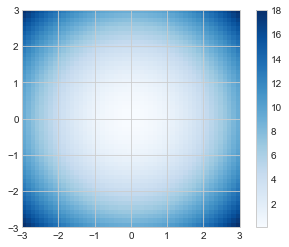

In [169]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower',
           cmap='Blues')
plt.colorbar()
plt.axis(aspect='image')

# when x=0, y=0, the gradient has magnitude zero, direction can be anywhere
# when x=1, y=0, the gradient has magnitude 2, in the positive x direction

c. 用自选方法计算下面矩阵乘法的结果（推荐手算）：

i. $$
\begin{pmatrix}
0 & 4 & 3
\end{pmatrix}
\begin{pmatrix}
9 \\
0 \\
3
\end{pmatrix}
$$

ii.
$$
\begin{pmatrix}
9 \\
0 \\
3
\end{pmatrix}
\begin{pmatrix}
0 & 4 & 3
\end{pmatrix}
$$

iii. 
$$
\begin{pmatrix}
9 & 3 \\
0 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
0 & 4 & 3 \\
0 & 4 & 3
\end{pmatrix}
$$

In [170]:
product1 = np.array(9)
product1

array(9)

In [171]:
product2 = np.array([0,36,27,0,0,0,0,12,9]).reshape(3,3)
product2

array([[ 0, 36, 27],
       [ 0,  0,  0],
       [ 0, 12,  9]])

In [172]:
product3 = np.array([0,48,36,0,8,6,0,28,21]).reshape(3,3)
product3

array([[ 0, 48, 36],
       [ 0,  8,  6],
       [ 0, 28, 21]])

d. 使用 seaborn 中的 regplot 功能对你在1d中计算的数据进行线性回归。描述你发现的关系并给出可能的原因。

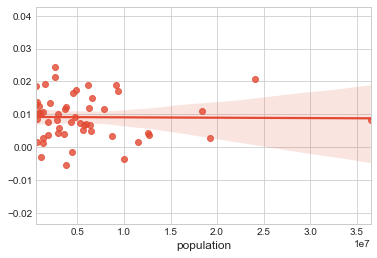

In [248]:
sns.regplot(pop_bar, CAGR)

In [ ]:
# it seems that growth rate is independent of population.

In [ ]:
#From a biological point of view, this might because the carrying capacity is far from being reached.

# 反馈
如果你对这个quiz的难度，预习的进度，以及课程目前以来的任何方面有任何建议或者问题都欢迎写在下面！

In [ ]:
#有雅思小作文内味儿了